## Face Mask Detection with Machine Learning
**Objective:** The goal of this project is to develop a machine learning model to accurately detect whether individuals are wearing face masks in images. This is particularly relevant in contexts where mask-wearing compliance is essential, such as in public health scenarios.

**Project Description:** In this project, students will leverage machine learning techniques to build and train a model for face mask detection. The project will involve collecting and preparing data, selecting appropriate algorithms, training the model, and evaluating its performance. The final deliverable will be a model capable of classifying images into categories of "masked" and "unmasked."

**Key Components:**

**1.	Data Collection:**

•	Students will use the Face Mask Detection Dataset, which includes images of both masked and unmasked faces.

•	Example datasets include the "Face Mask Detection Dataset" available for download from Kaggle.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.layers import Dense, Flatten # For creating the Neural Network Layers
from keras.models import Sequential # For creating a Sequential Model
from keras.utils import to_categorical # For converting the image labels to one-hot encoding values
from keras import utils #For utility function

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the base dir
base_dir = r"/content/drive/MyDrive/Final Project"
os.listdir(base_dir)

['.ipynb_checkpoints', 'Medical mask', 'submission.csv', 'train.csv']

In [4]:
# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/Final Project/train.csv')

In [5]:
# First 5 rows
train_df.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [6]:
# Shape of the data
train_df.shape

(15412, 6)

In [7]:
# Information of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15412 entries, 0 to 15411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       15412 non-null  object
 1   x1         15412 non-null  int64 
 2   x2         15412 non-null  int64 
 3   y1         15412 non-null  int64 
 4   y2         15412 non-null  int64 
 5   classname  15412 non-null  object
dtypes: int64(4), object(2)
memory usage: 722.6+ KB


In [8]:
# Summary of the data
train_df.describe()

,x1,x2,y1,y2
count,15412.000000,15412.000000,15412.000000,15412.000000
mean,343.696016,155.338373,531.480535,346.346224
std,312.239316,170.595556,398.407997,287.384566
min,0.000000,0.000000,13.000000,13.000000
25%,155.000000,52.000000,336.000000,194.000000
50%,279.000000,126.000000,462.000000,285.000000
75%,439.000000,211.000000,613.000000,419.000000
max,3598.000000,3549.000000,4912.000000,4370.000000


In [9]:
# Checking the null values
train_df.isnull().sum()

,0
name,0
x1,0
x2,0
y1,0
y2,0
classname,0


In [10]:
# Test data
sub_df = pd.read_csv('/content/drive/MyDrive/Final Project/submission.csv')

In [11]:
# Check the test data
sub_df.head()

,name,x1,x2,y1,y2,classname
0,1800.jpg,NaN,NaN,NaN,NaN,NaN
1,1800.jpg,NaN,NaN,NaN,NaN,NaN
2,1800.jpg,NaN,NaN,NaN,NaN,NaN
3,1799.jpg,NaN,NaN,NaN,NaN,NaN
4,1799.jpg,NaN,NaN,NaN,NaN,NaN


In [12]:
# Shape of the data
sub_df.shape

(8142, 6)

In [13]:
# Annotation directory
annot_dir = r'/content/drive/MyDrive/Final Project/Medical mask/Medical mask/Medical Mask/annotations'

In [14]:
# List of annotation directory
annot = os.listdir(annot_dir)

In [15]:
# Length of the annotation .json files
len(annot)

4326

In [16]:
print(f'First 5 annotations: {annot[:5]}')

First 5 annotations: ['6238.jpg.json', '6237.jpg.json', '6241.jpg.json', '6239.jpg.json', '6236.jpg.json']


In [17]:
# Image directory
image_dir = r'/content/drive/MyDrive/Final Project/Medical mask/Medical mask/Medical Mask/images'

In [18]:
# List of the image directory
images = os.listdir(image_dir)

In [19]:
len(images)

6024

In [20]:
print(f'First 5 images: {images[:5]}')

First 5 images: ['2915.png', '2916.png', '2917.png', '2918.png', '2919.png']


In [21]:
import os
import json


# Listing all files in the folder
all_files = os.listdir(annot_dir)

# Filtering out only the JSON files
json_files = [file for file in all_files if file.endswith('.json')]

# Select the first 5 JSON files
sample_files = json_files[:5]

# Process each of the 5 sample JSON files
for filename in sample_files:
    file_path = os.path.join(annot_dir, filename)

    try:
        with open(file_path, 'r') as file:
            data = json.load(file)

            # Print or process the JSON data
            print(f"Contents of {filename}:")
            print(json.dumps(data, indent=4))

    except json.JSONDecodeError:
        print(f"Error decoding JSON in file {filename}")
    except Exception as e:
        print(f"An error occurred with file {filename}: {e}")



Contents of 6238.jpg.json:
{
    "FileName": "6238.jpg",
    "NumOfAnno": 1,
    "Annotations": [
        {
            "isProtected": false,
            "ID": 542400505668348608,
            "BoundingBox": [
                244,
                80,
                572,
                511
            ],
            "classname": "face_no_mask",
            "Confidence": 1,
            "Attributes": {}
        }
    ]
}
Contents of 6237.jpg.json:
{
    "FileName": "6237.jpg",
    "NumOfAnno": 3,
    "Annotations": [
        {
            "isProtected": false,
            "ID": 545893537949680512,
            "BoundingBox": [
                330,
                96,
                492,
                315
            ],
            "classname": "face_no_mask",
            "Confidence": 1,
            "Attributes": {}
        },
        {
            "isProtected": false,
            "ID": 415862392845679616,
            "BoundingBox": [
                574,
                143,
        

In [22]:
# Processing the data with annotations and its images with training data
import os
import cv2
import random
import json

def getJSON(file_path):
    try:
        with open(file_path, 'r') as file:
            return json.load(file)
    except (json.JSONDecodeError, FileNotFoundError) as e:
        print(f"Error decoding JSON in file: {file_path}")
        print(f"Error message: {str(e)}")
        return None

data = []
img_size = 124
mask = ['face_with_mask']
non_mask = ["face_no_mask"]
labels = {'mask': 0, 'without mask': 1}

for i in train_df["name"].unique():
    f = i + ".json"
    json_data = getJSON(os.path.join(annot_dir, f))

    if json_data is None:
        continue  # Skip this iteration if JSON is invalid

    for j in json_data.get("Annotations", []):
        x, y, w, h = j["BoundingBox"]
        img_path = os.path.join(image_dir, i)

        if not os.path.exists(img_path):
            print(f"Image not found or could not be loaded for {i}")
            continue

        img = cv2.imread(img_path, 1)
        if img is None:
            print(f"Image not found or could not be loaded for {i}")
            continue

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (img_size, img_size))

        if j["classname"] in mask:
            data.append([img, labels["mask"]])
        elif j["classname"] in non_mask:
            data.append([img, labels["without mask"]])

random.shuffle(data)


Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Image not found or could not be loaded for 3980.png
Error decoding JSON in file: /content/drive/MyDrive/Final Project/Medical mask/Medical mask/Medical Mask/annotations/2674.png.json
Error message: Expecting value: line 1 column 1 (char 0)


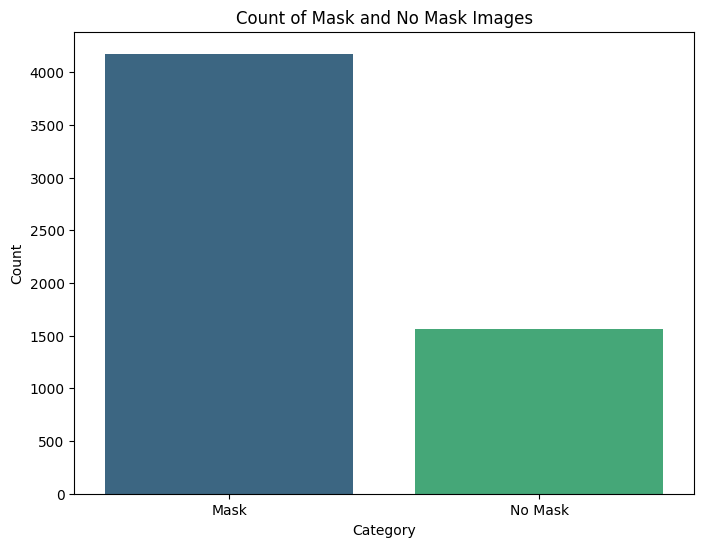

In [23]:
# Plot the Mask and No Mask count
import matplotlib.pyplot as plt
import seaborn as sns

mask_count = sum(1 for _, label in data if label == labels['mask'])
no_mask_count = sum(1 for _, label in data if label == labels['without mask'])

# Preparing data for plotting
counts = [mask_count, no_mask_count]
categories = ['Mask', 'No Mask']

# Plotting the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette="viridis")

# Adding titles and labels
plt.title("Count of Mask and No Mask Images")
plt.xlabel("Category")
plt.ylabel("Count")

# Display the plot
plt.show()


In [24]:
# Split the dataset and convert to array for image generator
from sklearn.model_selection import train_test_split
import numpy as np

# Convert the list to a NumPy array for easier manipulation
data = np.array(data, dtype=object)

# Separate the images and labels
X = np.array([item[0] for item in data])  # Images
y = np.array([item[1] for item in data])  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes of the splits
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (4595, 124, 124, 3), Training labels shape: (4595,)
Testing data shape: (1149, 124, 124, 3), Testing labels shape: (1149,)


In [25]:
X[0].shape

(124, 124, 3)

In [26]:
np.unique(y)

array([0, 1])

####2.	Data Preprocessing:
•	Images should be resized to a consistent dimension.

•	Students should perform data augmentation (e.g., rotations, flips) to improve model robustness.

•	Split the dataset into training, validation, and testing sets.


In [27]:
from tensorflow.keras.layers import Input, Flatten, Dense  # Import necessary layers from Keras
from tensorflow.keras.models import Model, Sequential  # Import Model and Sequential from Keras models

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3,
# ReLU activation, glorot uniform kernel initializer, and input shape of (124, 124, 3)
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', kernel_initializer='he_uniform', input_shape=(124, 124, 3)))

# Add a max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D arrays into a 1D array for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 100 neurons, ReLU activation
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

# Sigmoid activation function for multi-class classification
model.add(Dense(1, activation='sigmoid'))

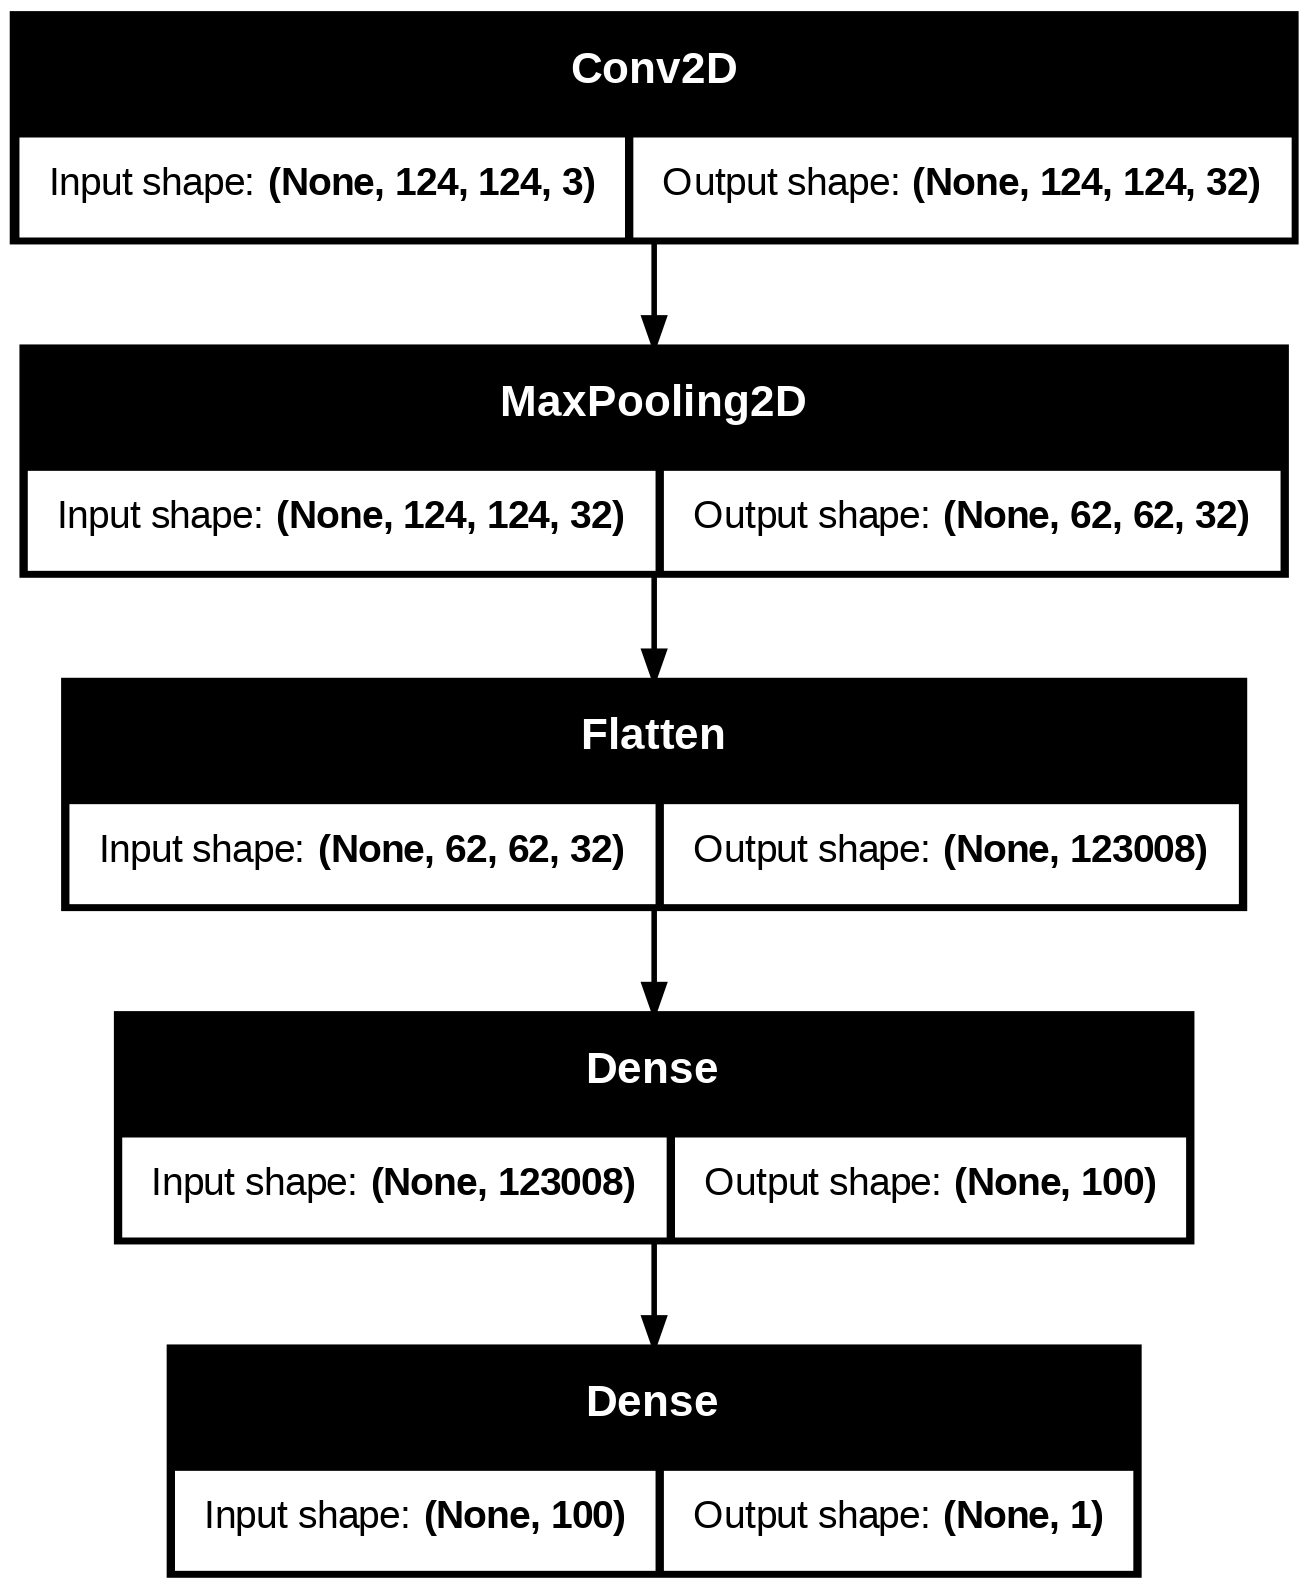

In [29]:
# Model architecture
utils.plot_model(model, show_shapes=True)


In [30]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4595, 124, 124, 3)
y_train shape: (4595,)
X_test shape: (1149, 124, 124, 3)
y_test shape: (1149,)


In [32]:
# Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # import the ImageDataGenerator class from tensorflow.keras.preprocessing.image

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)
datagen.fit(X_train)

In [33]:
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=X_train.shape[0]//32,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 827ms/step - accuracy: 0.6340 - loss: 1723.0310 - val_accuracy: 0.7180 - val_loss: 78.7348
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5625 - loss: 150.3769 - val_accuracy: 0.5074 - val_loss: 138.8029
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 116s 802ms/step - accuracy: 0.6670 - loss: 71.5247 - val_accuracy: 0.7293 - val_loss: 45.4746
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8125 - loss: 42.3630 - val_accuracy: 0.7302 - val_loss: 46.4571
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 825ms/step - accuracy: 0.6261 - loss: 40.8169 - val_accuracy: 0.7137 - val_loss: 39.5514


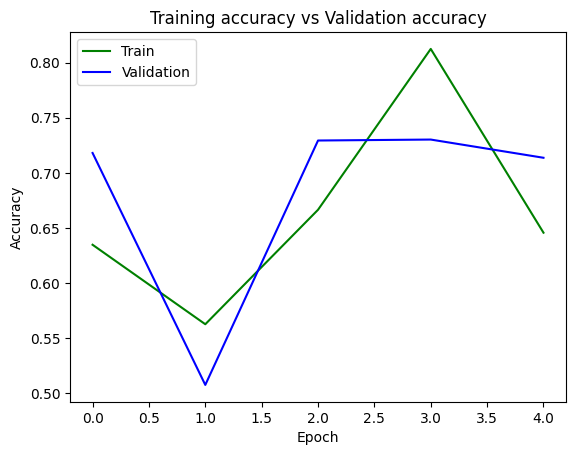

In [34]:
# Accuracy
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Training accuracy vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

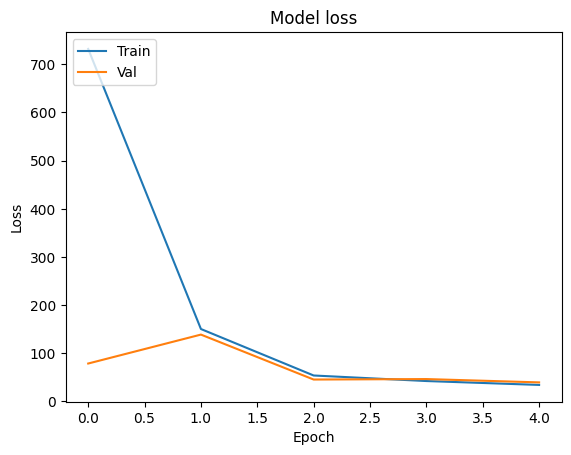

In [35]:
# Loss
plt.plot(history.history['loss'])  # Plot training loss
plt.plot(history.history['val_loss'])  # Plot validation loss
plt.title('Model loss')  # Set the title of the plot
plt.ylabel('Loss')  # Label for the y-axis
plt.xlabel('Epoch')  # Label for the x-axis
plt.legend(['Train', 'Val'], loc='upper left')  # Add a legend indicating 'Train' and 'Val' curves
plt.show()  # Display the plot


# Testing the Model

In [36]:
# Unique values in test data
print(len(sub_df["name"]),len(sub_df["name"].unique()))


8142 1698


In [37]:
test_images = sub_df['name'].unique()

test_images[500:600]

array(['1275.jpg', '1274.jpg', '1271.jpg', '1270.jpg', '1269.jpg',
       '1268.jpg', '1267.jpg', '1266.jpg', '1265.jpg', '1264.jpg',
       '1263.jpeg', '1262.jpg', '1261.jpg', '1260.jpg', '1259.jpg',
       '1258.jpg', '1257.jpg', '1256.jpg', '1255.jpg', '1254.jpg',
       '1253.jpg', '1252.jpg', '1251.jpg', '1250.jpg', '1249.jpg',
       '1248.jpg', '1247.jpg', '1246.jpg', '1245.jpg', '1244.jpg',
       '1243.jpg', '1242.jpeg', '1241.jpg', '1240.jpg', '1239.jpg',
       '1238.jpg', '1237.jpg', '1236.jpg', '1235.jpg', '1234.jpg',
       '1233.jpg', '1232.jpg', '1230.jpg', '1229.jpg', '1226.jpg',
       '1224.jpg', '1223.jpg', '1222.jpg', '1221.jpg', '1220.jpg',
       '1219.jpg', '1218.jpg', '1217.jpg', '1216.jpg', '1215.jpg',
       '1214.jpg', '1213.jpg', '1212.jpg', '1211.jpg', '1210.jpg',
       '1209.jpg', '1208.jpg', '1207.jpg', '1206.jpg', '1205.jpg',
       '1204.jpg', '1201.jpg', '1200.jpg', '1199.jpg', '1198.jpg',
       '1197.jpg', '1196.jpg', '1195.jpg', '1193.jpg', '1192

In [38]:
test_images =['1767.jpg','1799.jpg','1241.jpg','1166.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


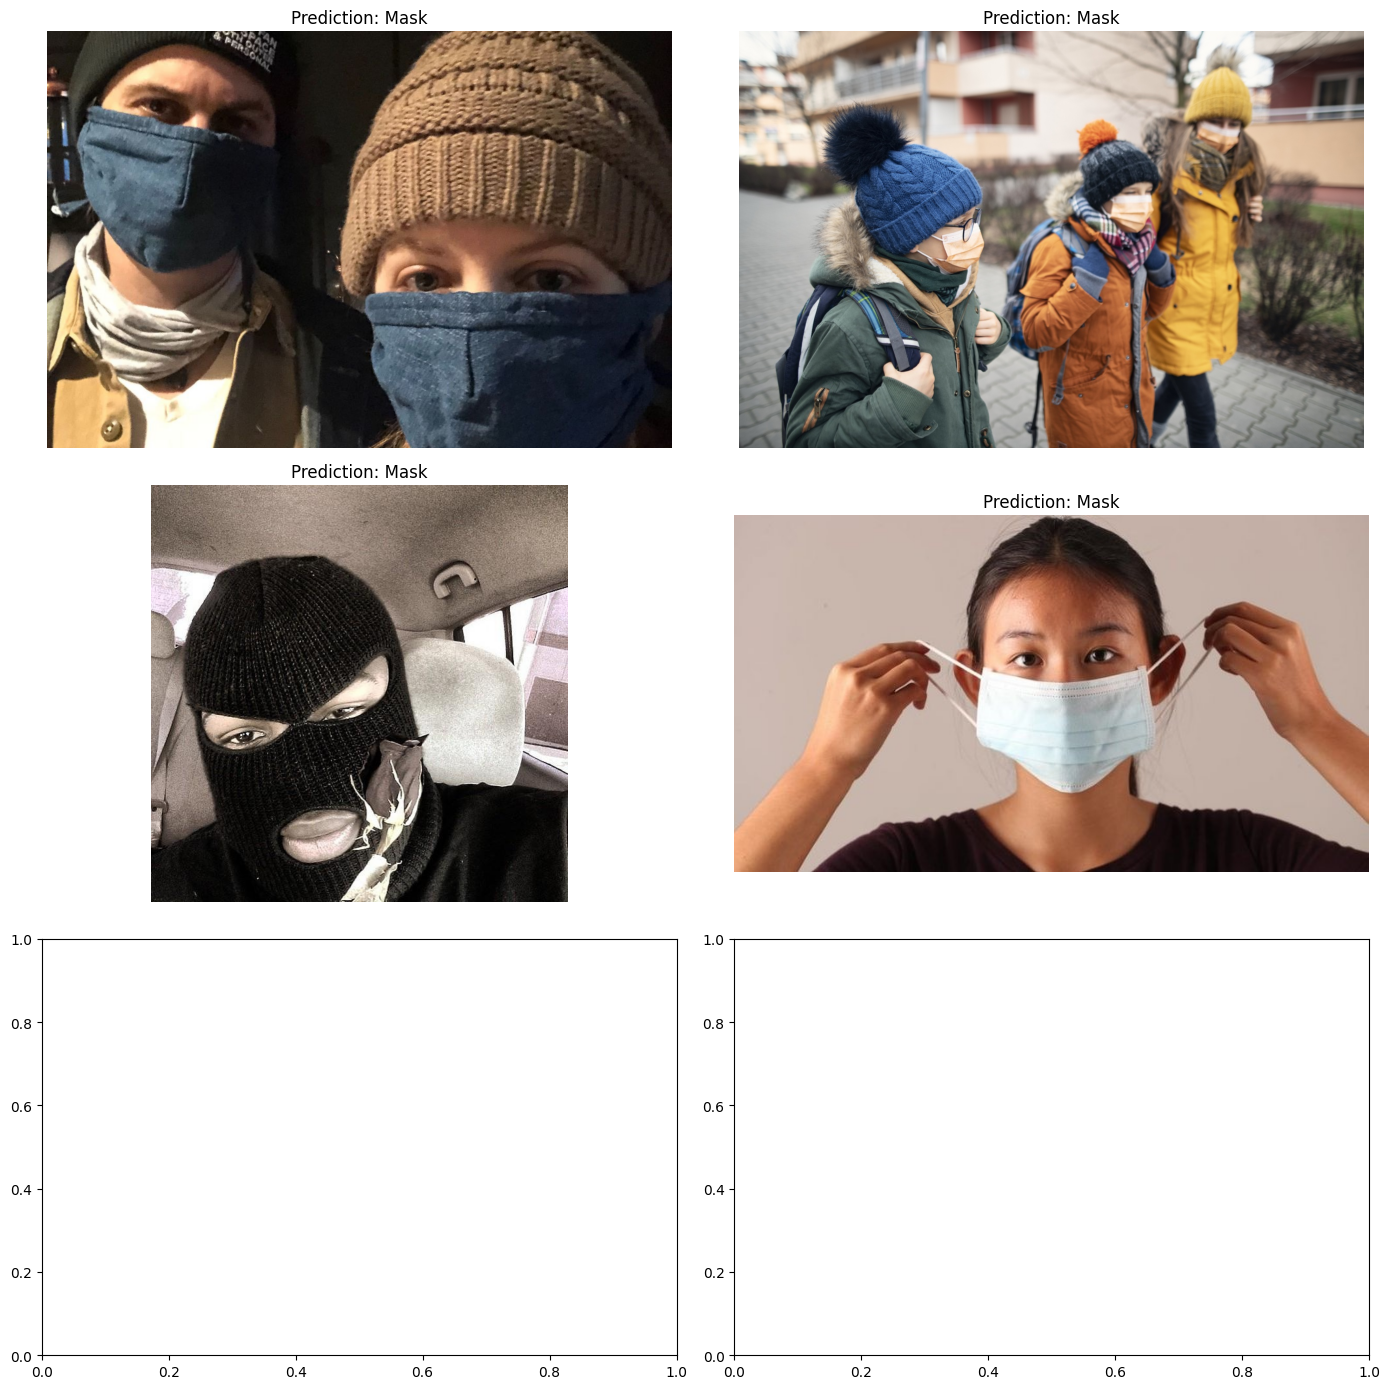

In [39]:
# Predicting the mask with visualization
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img


img_size = 124
assign = {0: 'Mask', 1: 'No Mask'}  # Update this if your classes are different


fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, img_name in enumerate(test_images):
    # Load the image
    img_path = os.path.join(image_dir, img_name)
    img = load_img(img_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match input shape

    # Make a prediction
    prediction = model.predict(img_array)
    label_Y = 1 if prediction > 0.5 else 0  # Assuming binary classification

    # Load the original image
    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Display the image and prediction
    axes[i].imshow(original_image)
    axes[i].set_title(f"Prediction: {assign[label_Y]}")
    axes[i].axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [40]:
model.save('face_mask_detection_model.h5')